In [1]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
 # Import the data
csv =pd.read_csv("Resources/myopia.csv")
csv.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# List dataframe data types
csv.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [4]:
# Remove the "MYOPIC" column from the dataset
column = csv['MYOPIC']
csv = csv.drop(['MYOPIC'], axis = 1)
csv.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(csv)
X_scaled[0:2]

array([[-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
        -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
         0.18405806,  0.49830393,  0.98713773,  1.0032415 ],
       [-0.42021911, -0.30861224, -0.1718398 ,  0.53591028, -0.96799728,
        -0.13076253, -0.99889822, -0.91206246, -0.36187479, -0.22140908,
        -0.34093217, -0.87508755,  0.98713773,  1.0032415 ]])

# Dimensionality Reduction

In [6]:
# Initialize PCA model, preserve 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.9)

# Get principal components for X_scaled
csv_pca = pca.fit_transform(X_scaled)

In [8]:
# Transform PCA data to a DataFrame
csv_pca = pd.DataFrame(data=csv_pca)
csv_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [9]:
# Fetch the explained variance
pca.explained_variance_ratio_
print(f'Explained Variance: {pca.explained_variance_ratio_}')
print(f'Explained Variance Total: {pca.explained_variance_ratio_.sum()}')

Explained Variance: [0.21177355 0.15659716 0.08688023 0.08301762 0.07584858 0.06997878
 0.06486986 0.06377808 0.05393666 0.05205566]
Explained Variance Total: 0.9187361702915189


# t-SNE

In [12]:
# Initialize PCA model, Reduce to 2-3 dimensions
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(csv_pca)

In [13]:
# Check how many columns the dataset now has
tsne_features.shape

(618, 2)

In [14]:
# Check label counts
column.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

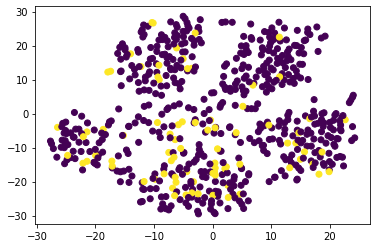

In [15]:
# Create a scatter plot of the t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=column)
plt.show()

# K-Means

In [ ]:

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve 
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

In [ ]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia (nearsightedness)')
plt.show()

In [ ]:

# Add a class column to the myopia_pca DataFrame for the K-Means model
myopia_k_df = pd.DataFrame(data=myopia_pca)
myopia_k_df['class']= km.labels_
myopia_k_df.head()

In [ ]:
# Initialize the K-Means model
model = KMeans(n_clusters=3, random_state=0)

# Train the model
model.fit(myopia_k_df)

# Predict clusters
predictions = model.predict(myopia_k_df)

In [ ]:
# Update labels based on the model
myopia_k_df['class']= model.labels_

# Plot the clusters using a scatter plot
plt.scatter(myopia_k_df[0], myopia_k_df[1], c=myopia_k_df['class'])
plt.title('Clusters in Myopia Dataset')
plt.show()

# Recommendation

### After cleaning the dataset and applying dimensionality reducation, t-SNE, and K-means to visualize a cluster analysis, there are 3 different groups of patiens causing clusters. I reecommend analyzing each cluster individually to learn more about patiens within each group.

### I learned that applying several different algorithm methods is important because when using t-SNE there were no clusters found within the dataset. 
